# Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# The Data
Let's start to read CSV file of our dateset into a pandas dataframe.

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Class                       False
dtype: bool

Text(0.5, 1.0, 'This plot shows Null values')

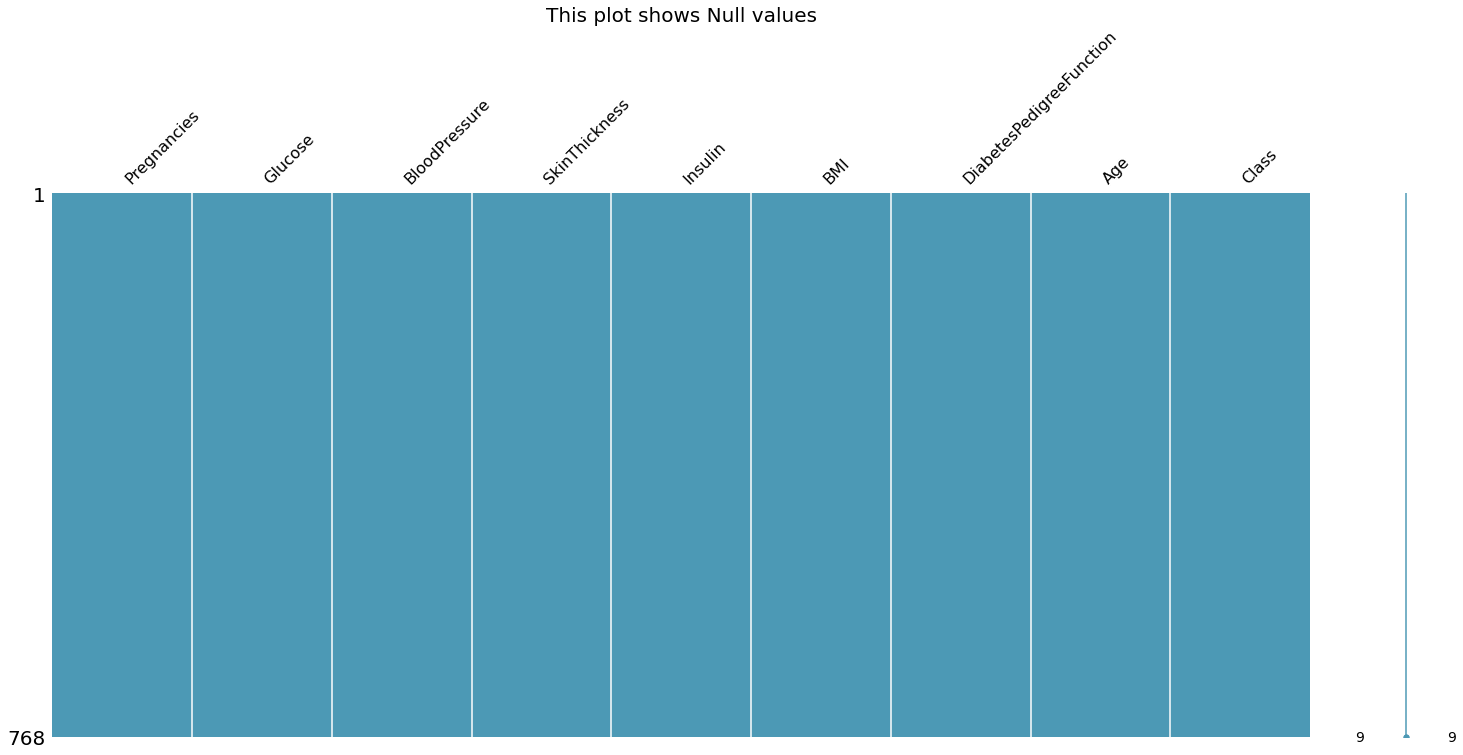

In [8]:
mn.matrix(df,color=(0.30,0.60,0.71))
plt.title("This plot shows Null values",fontdict={'fontsize':20})

From above info and plot we can see that there is no null values in our dataset 

# visualization of the data to see relationship between data !

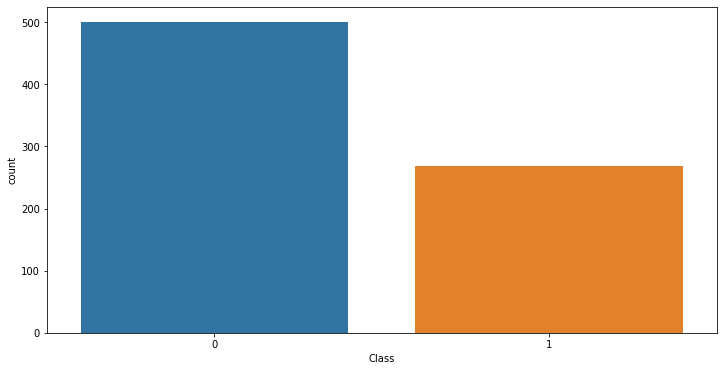

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(df['Class'])

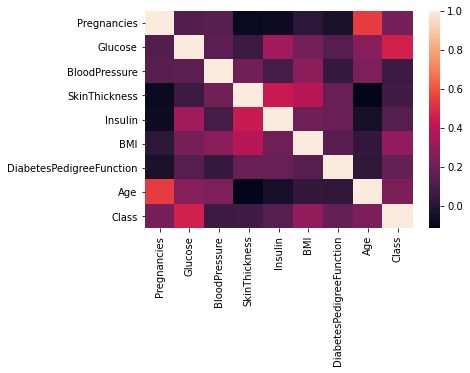

In [10]:
sns.heatmap(df.corr())

From this heatman we say that there is factor which are co-related with each other .

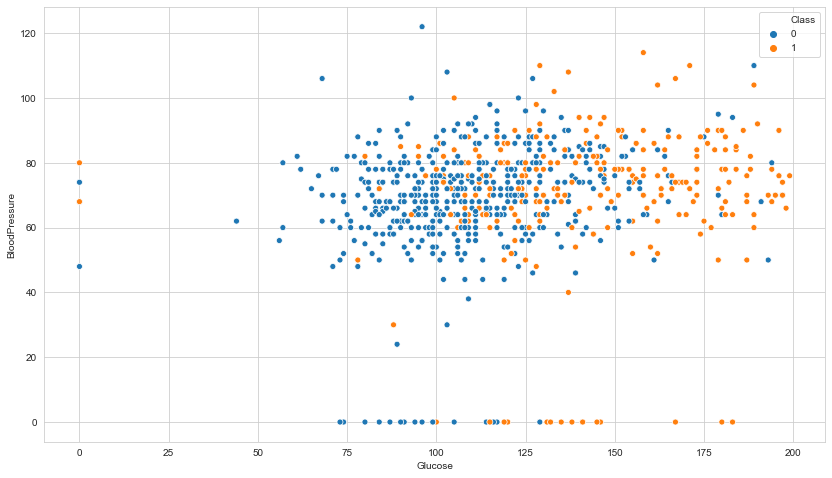

In [11]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.scatterplot(df['Glucose'],df['BloodPressure'],hue=df['Class'])

From above scatterplot we can say that :                         
if Glucose is greater than ~ 125 and            
BloodPressure  is greater than ~60             
then  we have more chances to getting Diabetes

C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rushi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


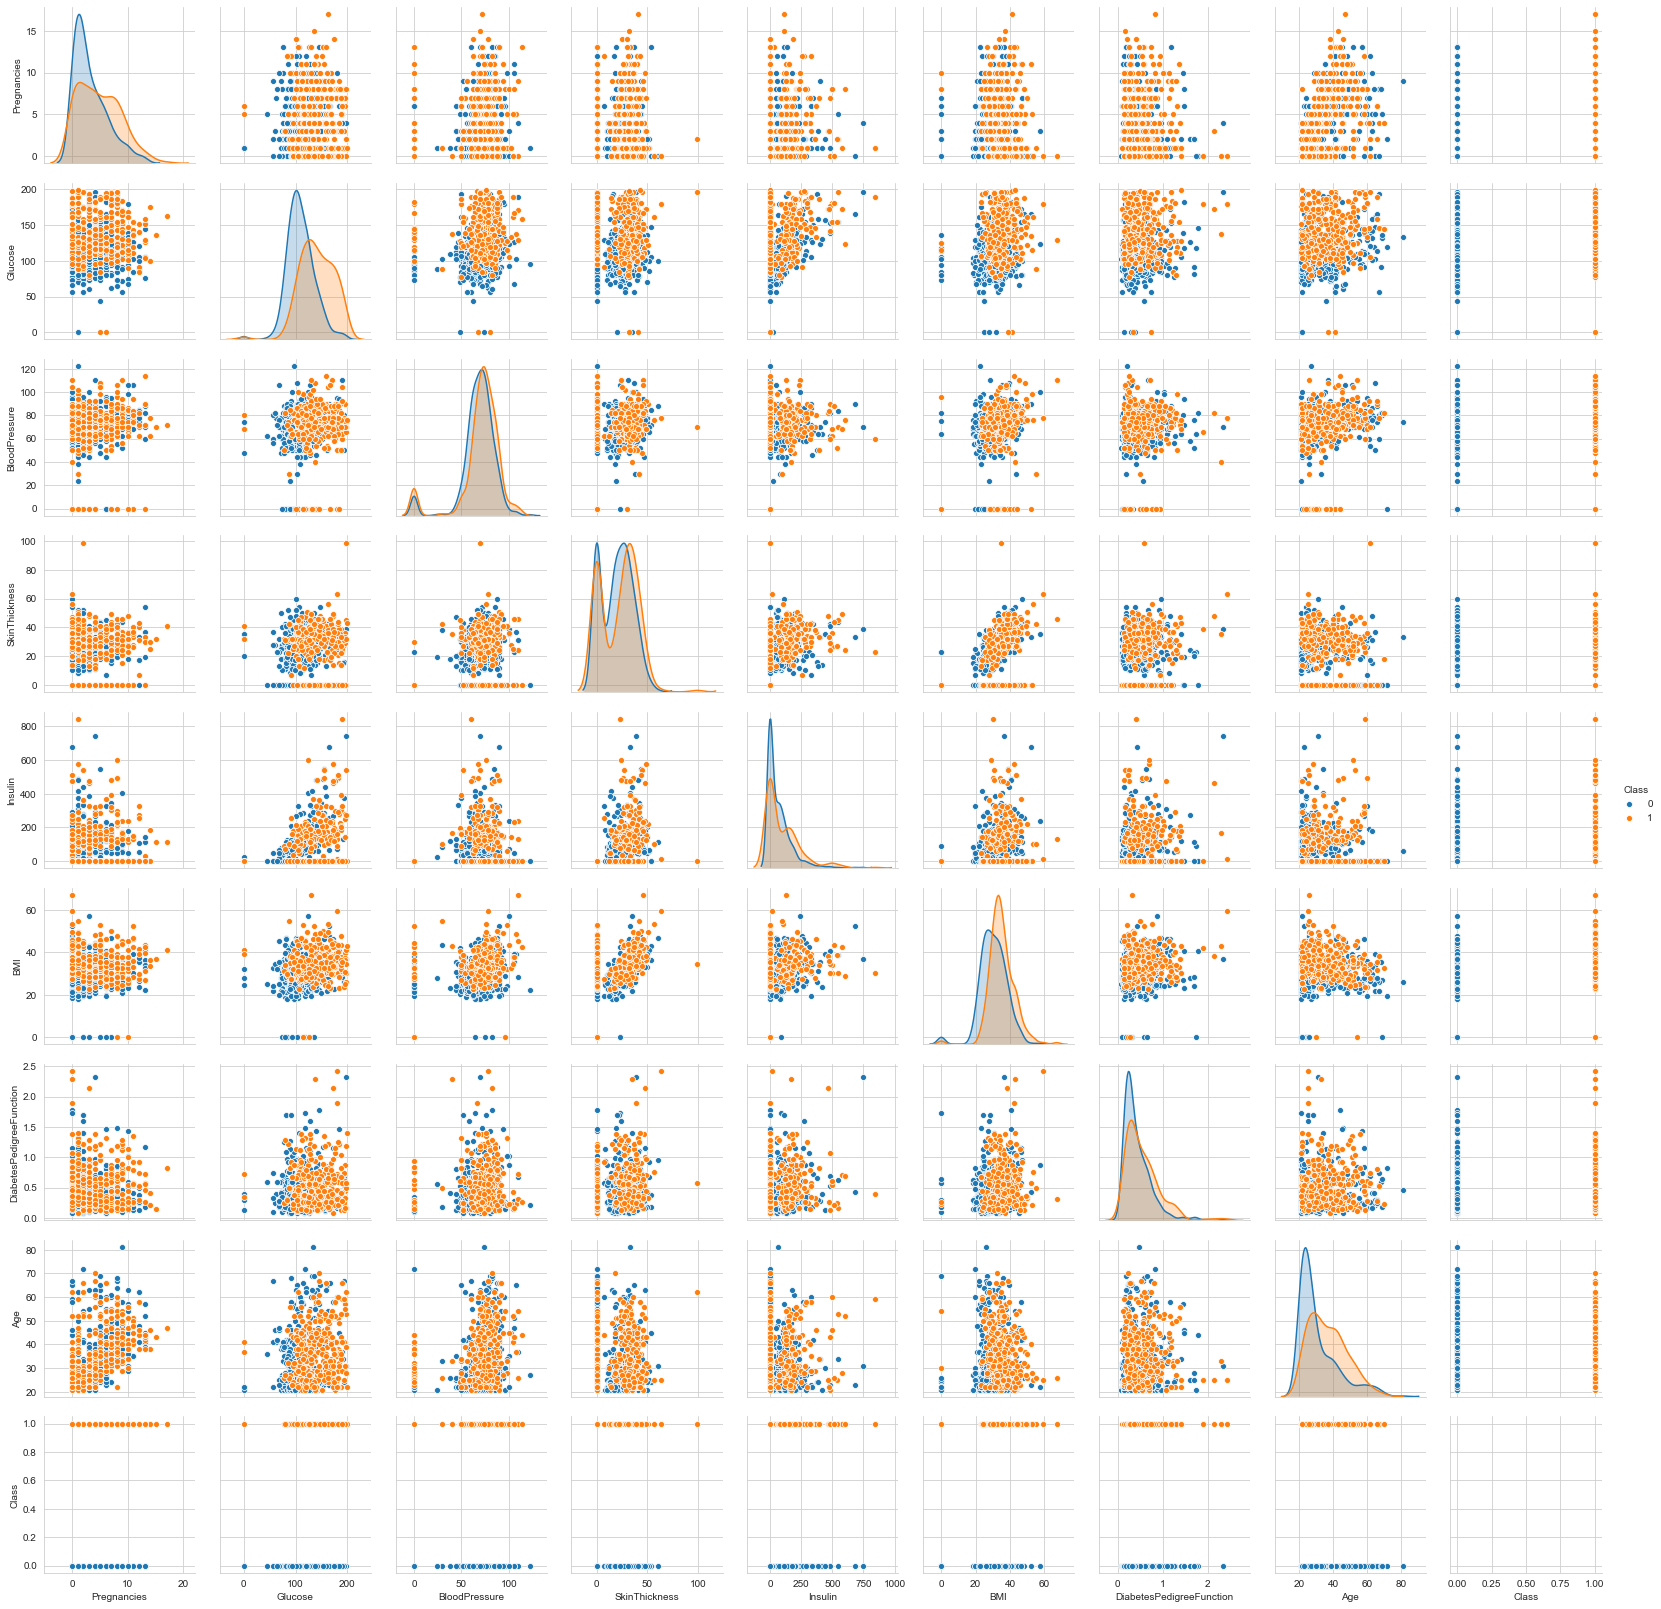

In [12]:
sns.pairplot(df, hue='Class')

# Data Cleaning
    In this dataset there is no null values are present but there is some '0' values which we want to replace by mean of     that column .

In [13]:
#find '0' value's column
p=len(df.loc[df['Pregnancies']==0])
g=len(df.loc[df['Glucose']==0])
bp=len(df.loc[df['BloodPressure']==0])
s=len(df.loc[df['SkinThickness']==0])
i=len(df.loc[df['Insulin']==0])
b=len(df.loc[df['BMI']==0])
dpf=len(df.loc[df['DiabetesPedigreeFunction']==0])
a=len(df.loc[df['Age']==0])
print("Number of '0' valus in each columns : {} , {} , {} , {} , {} , {} , {} , {} ,".format(p,g,bp,s,i,b,dpf,a))

Number of '0' valus in each columns : 111 , 5 , 35 , 227 , 374 , 11 , 0 , 0 ,


In [14]:
#replacing '0' by its mean
df.loc[(df.Pregnancies == 0),'Pregnancies']=df['Pregnancies'].mean()
df.loc[(df.Glucose == 0),'Glucose']=df['Glucose'].mean()
df.loc[(df.BloodPressure == 0),'BloodPressure']=df['BloodPressure'].mean()
df.loc[(df.SkinThickness == 0),'SkinThickness']=df['SkinThickness'].mean()
df.loc[(df.Insulin == 0),'Insulin']=df['Insulin'].mean()
df.loc[(df.BMI == 0),'BMI']=df['BMI'].mean()

In [15]:
#After removing '0' value's column
p=len(df.loc[df['Pregnancies']==0])
g=len(df.loc[df['Glucose']==0])
bp=len(df.loc[df['BloodPressure']==0])
s=len(df.loc[df['SkinThickness']==0])
i=len(df.loc[df['Insulin']==0])
b=len(df.loc[df['BMI']==0])
dpf=len(df.loc[df['DiabetesPedigreeFunction']==0])
a=len(df.loc[df['Age']==0])
print("Number of '0' valus in each columns : {} , {} , {} , {} , {} , {} , {} , {} ,".format(p,g,bp,s,i,b,dpf,a))

Number of '0' valus in each columns : 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 ,


Now, there is no null/'0' values in our dataset 

# Building a Logistic Regration model

## Train Test Split

In [16]:
X=df.iloc[:,:8]

In [17]:
Y=df[['Class']]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_text = train_test_split(X,Y,test_size=18,random_state=1)

## Training and Predicting

In [20]:
acc=[]
for i in range(len(df)):
    x_train,x_test,y_train,y_text = train_test_split(X,Y,test_size=20,random_state=i)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y=model.score(x_test,y_text)
    acc.append(y)
print("Accuracy is : {0:.2f} %".format(max(acc)*100))

Accuracy is : 70.30 %
